In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [5]:
#to check the dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
#check for null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
df.shape

(10000, 10)

In [9]:
df.describe(include='object')#it will give the count of object  columns

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [10]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

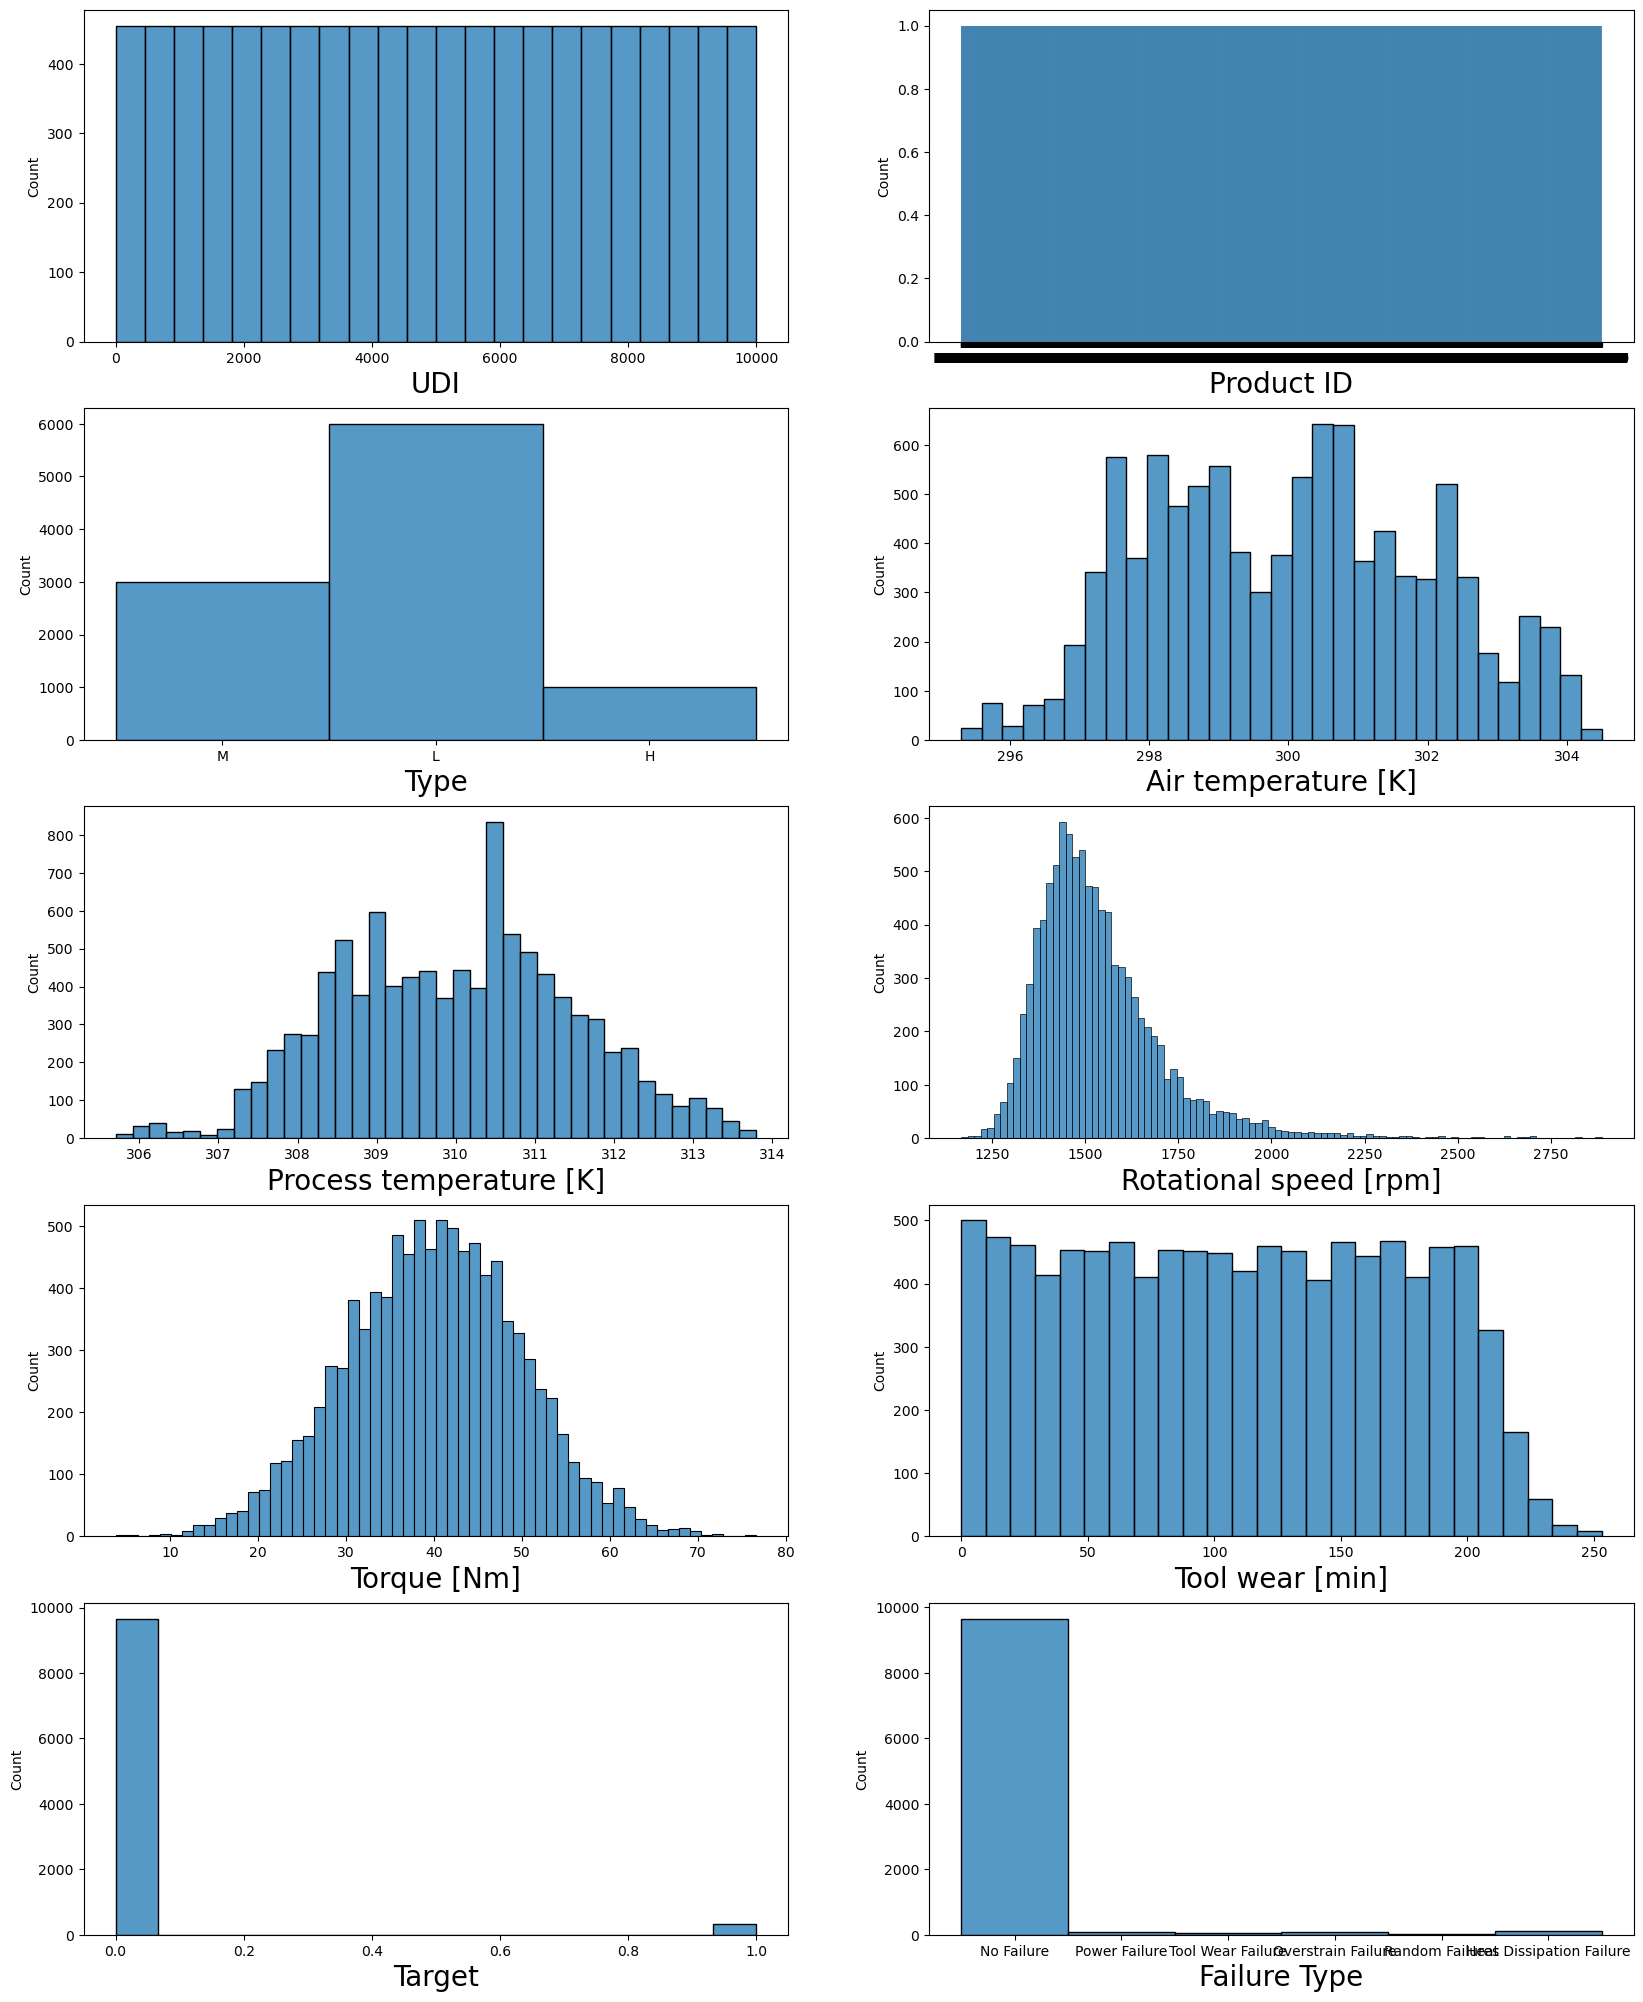

In [11]:
#EDA
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=10 :     # as there are 10 columns in the data
        ax = plt.subplot(5,2,plotnumber)# plotting 10 graphs (5-rows,2-columns) ,plotnumber is for count  
        sns.histplot(x=df[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show gra

#Insights from above univariant analysis of data are as follows.
* There are 6000 machines of "L" Type and 3000 machines of "M" Type and nearly 1000 machines are of "H type".
* There are 600 machines having air temperature between 297K to 303K. The remaining machines having less air temperature during work.
* There are more than 800 machine which reaches the process temperature between 310K to 311K. Also the other machines whose temperature is lies between 308K to 312K during processing.
* there are 600 machine who reaches the Rotational spees of 1500 rpm,500 machines reaches rotational speed of 1400 to 1500rpm.There are very few machines who reaches the maximum rotational speed of 2000 rpm these may be less than 100 machines.
* There are 500 machines who reaches torque between 35Nm to 45Nm.
* There are machines who might face the failure due to tool wear(min) upto 220 tool wear min.


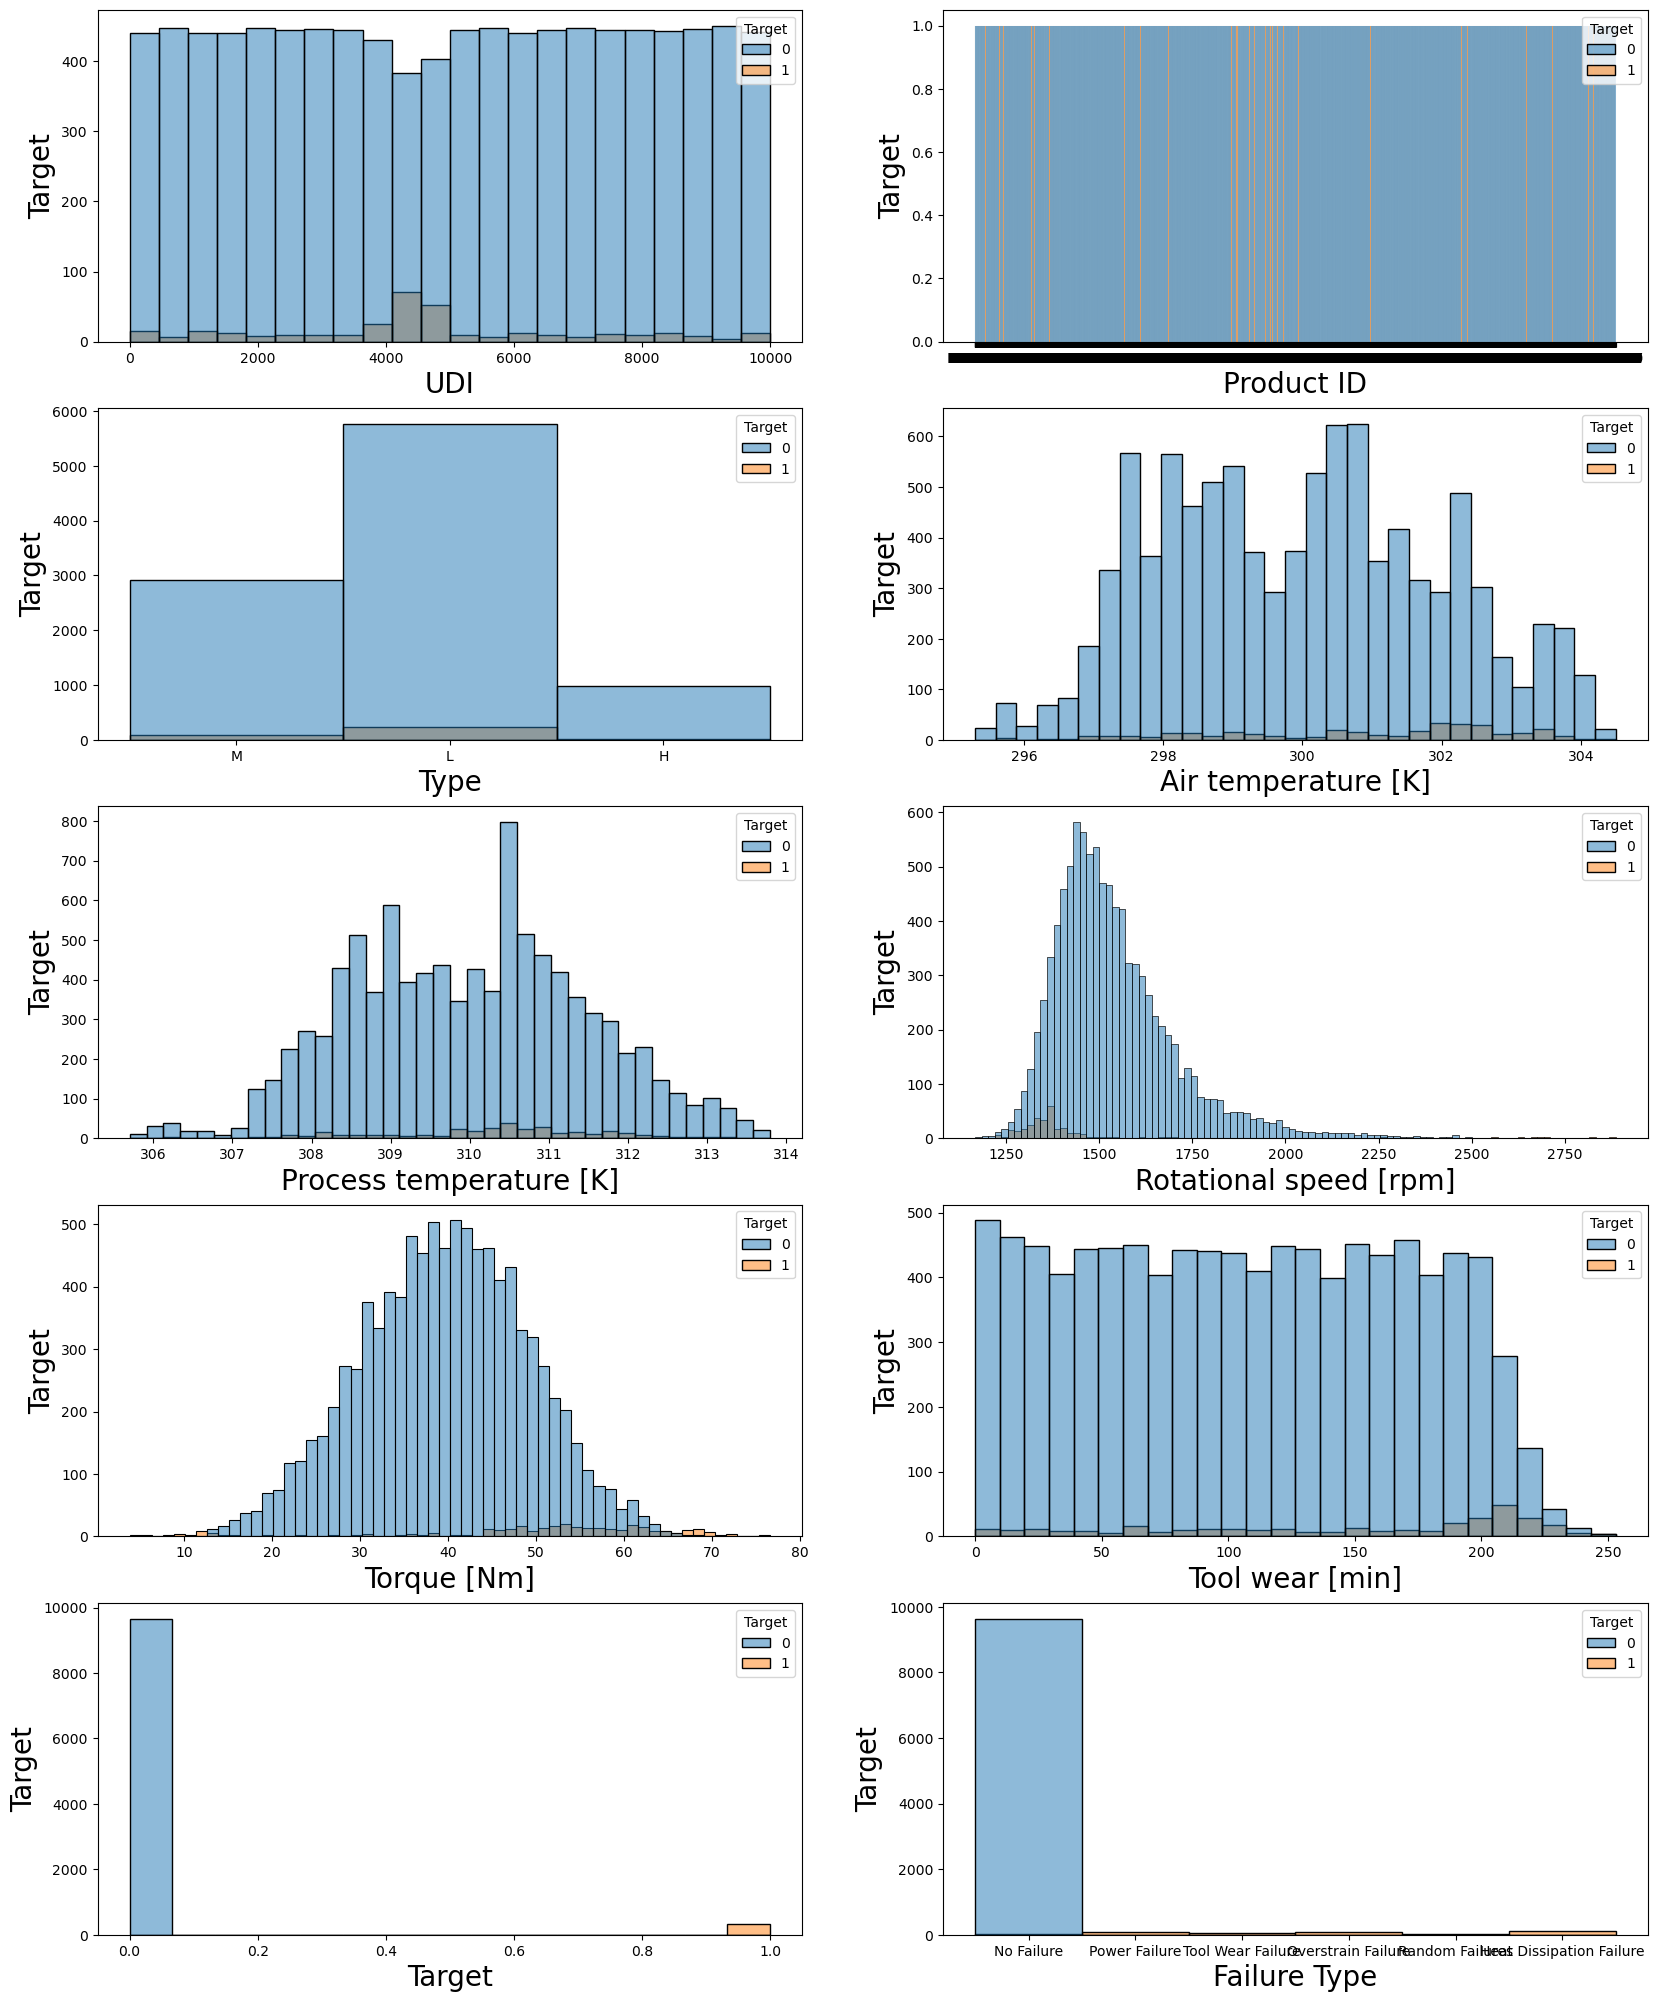

In [12]:
#Bivariant analysis
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=10 :     # as there are 9 columns in the data
        ax = plt.subplot(5,2,plotnumber)# plotting 10 graphs (5-rows,2-columns) ,plotnumber is for count  
        sns.histplot(x=df[column],hue=df.Target) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('Target',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

In [13]:
#we have to convert the categorical columns into numerical column
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Product ID']=lb.fit_transform(df['Product ID'])
df['Type']=lb.fit_transform(df['Type'])

df['Failure Type'].unique()
df['Failure Type']=lb.fit_transform(df['Failure Type'])

print(df.head())

   UDI  Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1        7003     2                298.1                    308.6   
1    2        1003     1                298.2                    308.7   
2    3        1004     1                298.1                    308.5   
3    4        1005     1                298.2                    308.6   
4    5        1006     1                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  
0                    1551         42.8                0       0             1  
1                    1408         46.3                3       0             1  
2                    1498         49.4                5       0             1  
3                    1433         39.5                7       0             1  
4                    1408         40.0                9       0             1  


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  int64  
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


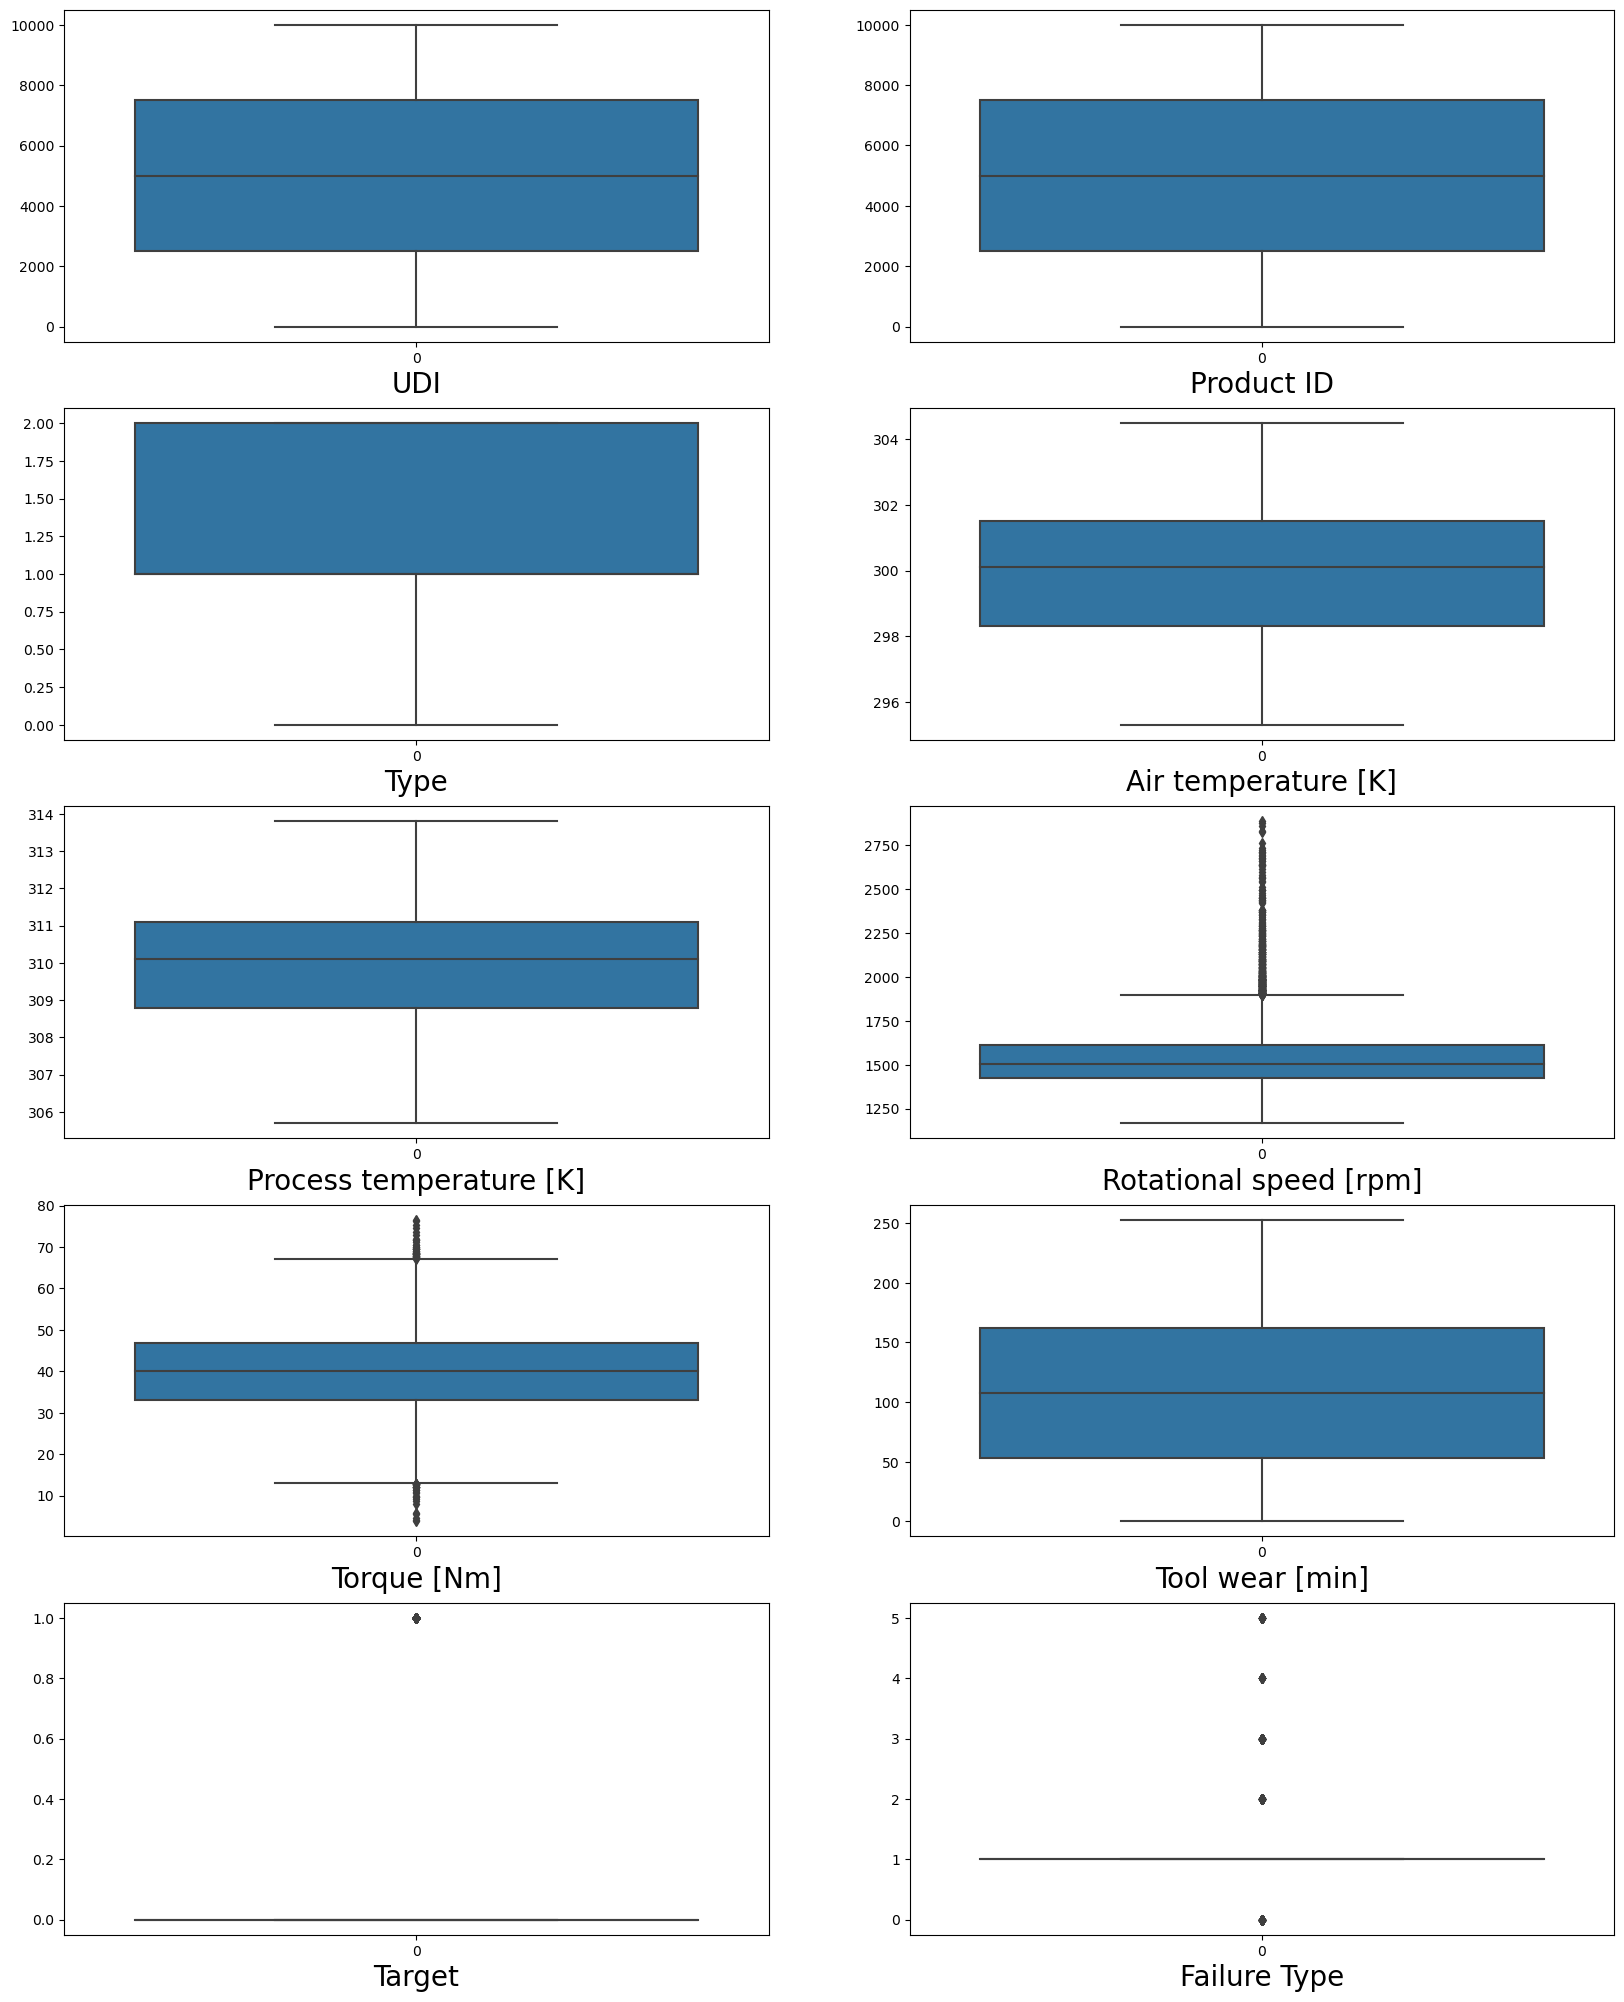

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1#counter

for column in df:#columns form data1
    if plotnumber<=10 :#checking whether plot number is less or equal to 6
        ax = plt.subplot(5,2,plotnumber)# 
        sns.boxplot(df[column])# ploting boxplot fo outlier 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#we have seen the outliers by seeing at boxplot and we found that is good to process further.

In [16]:
df['Target'].value_counts()
# => No failure->0
#=>Failure -> 1

0    9661
1     339
Name: Target, dtype: int64

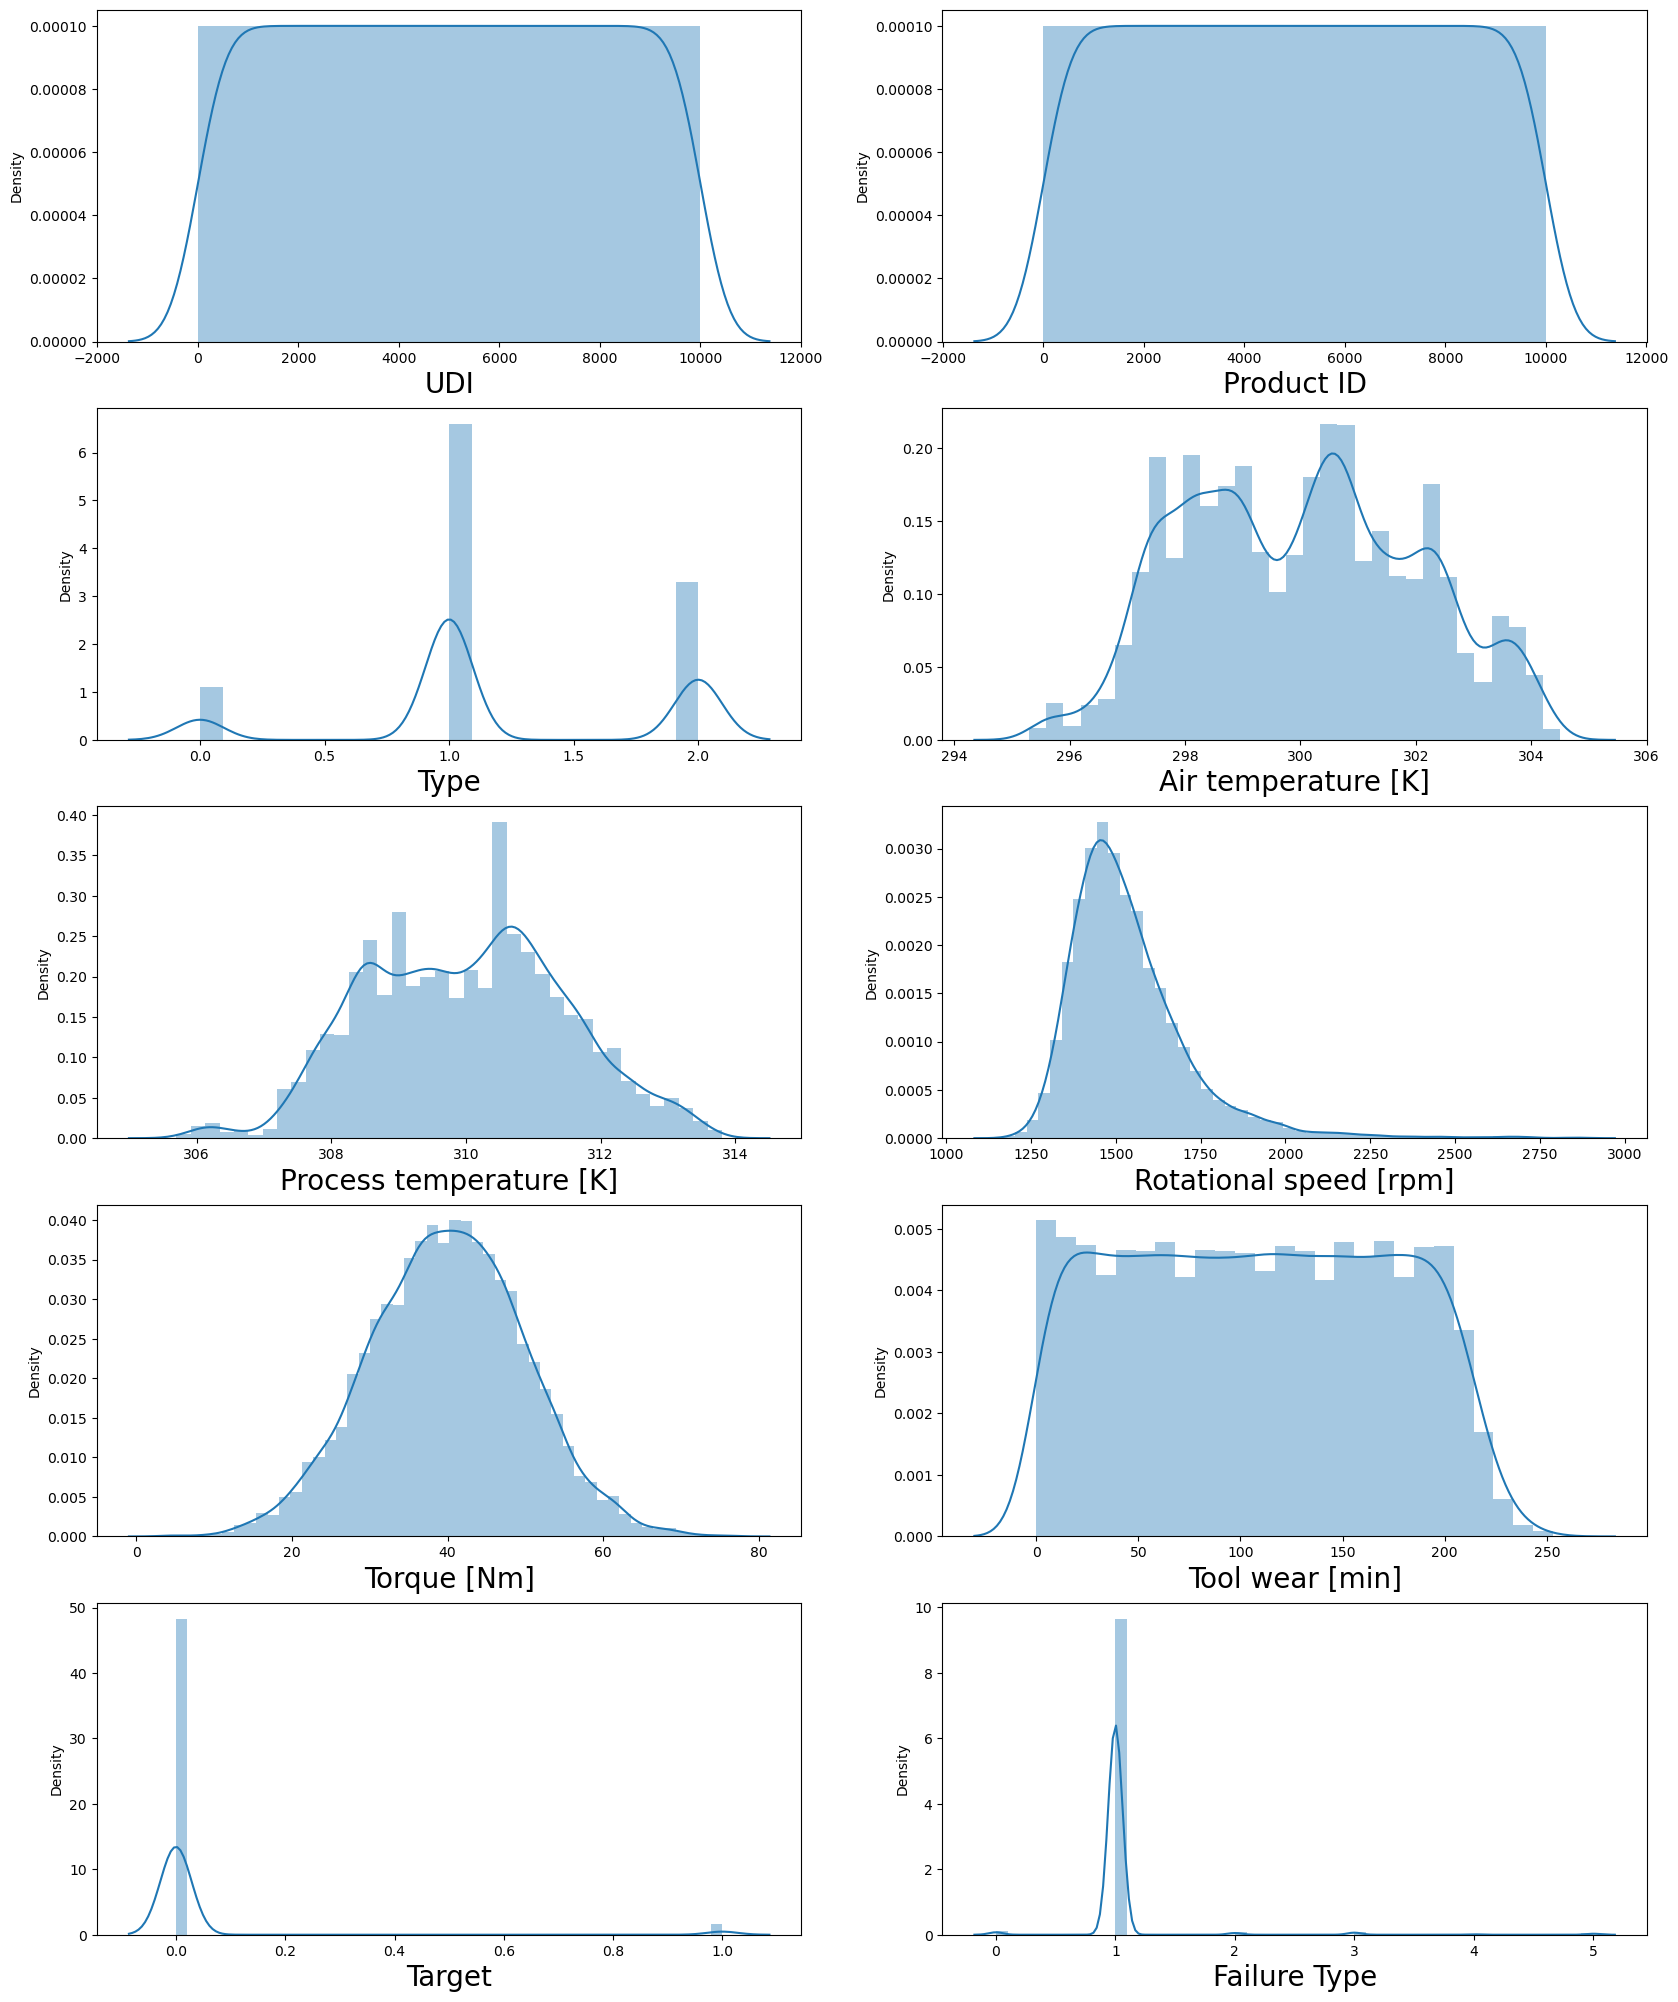

In [17]:
#checking for symmetry distribution
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in df: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=10 :     # as there are 6 columns in the data
        ax = plt.subplot(5,2,plotnumber)# plotting 10 graphs (5-rows,2-columns) ,plotnumber is for count  
        sns.distplot(x=df[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph


<Axes: >

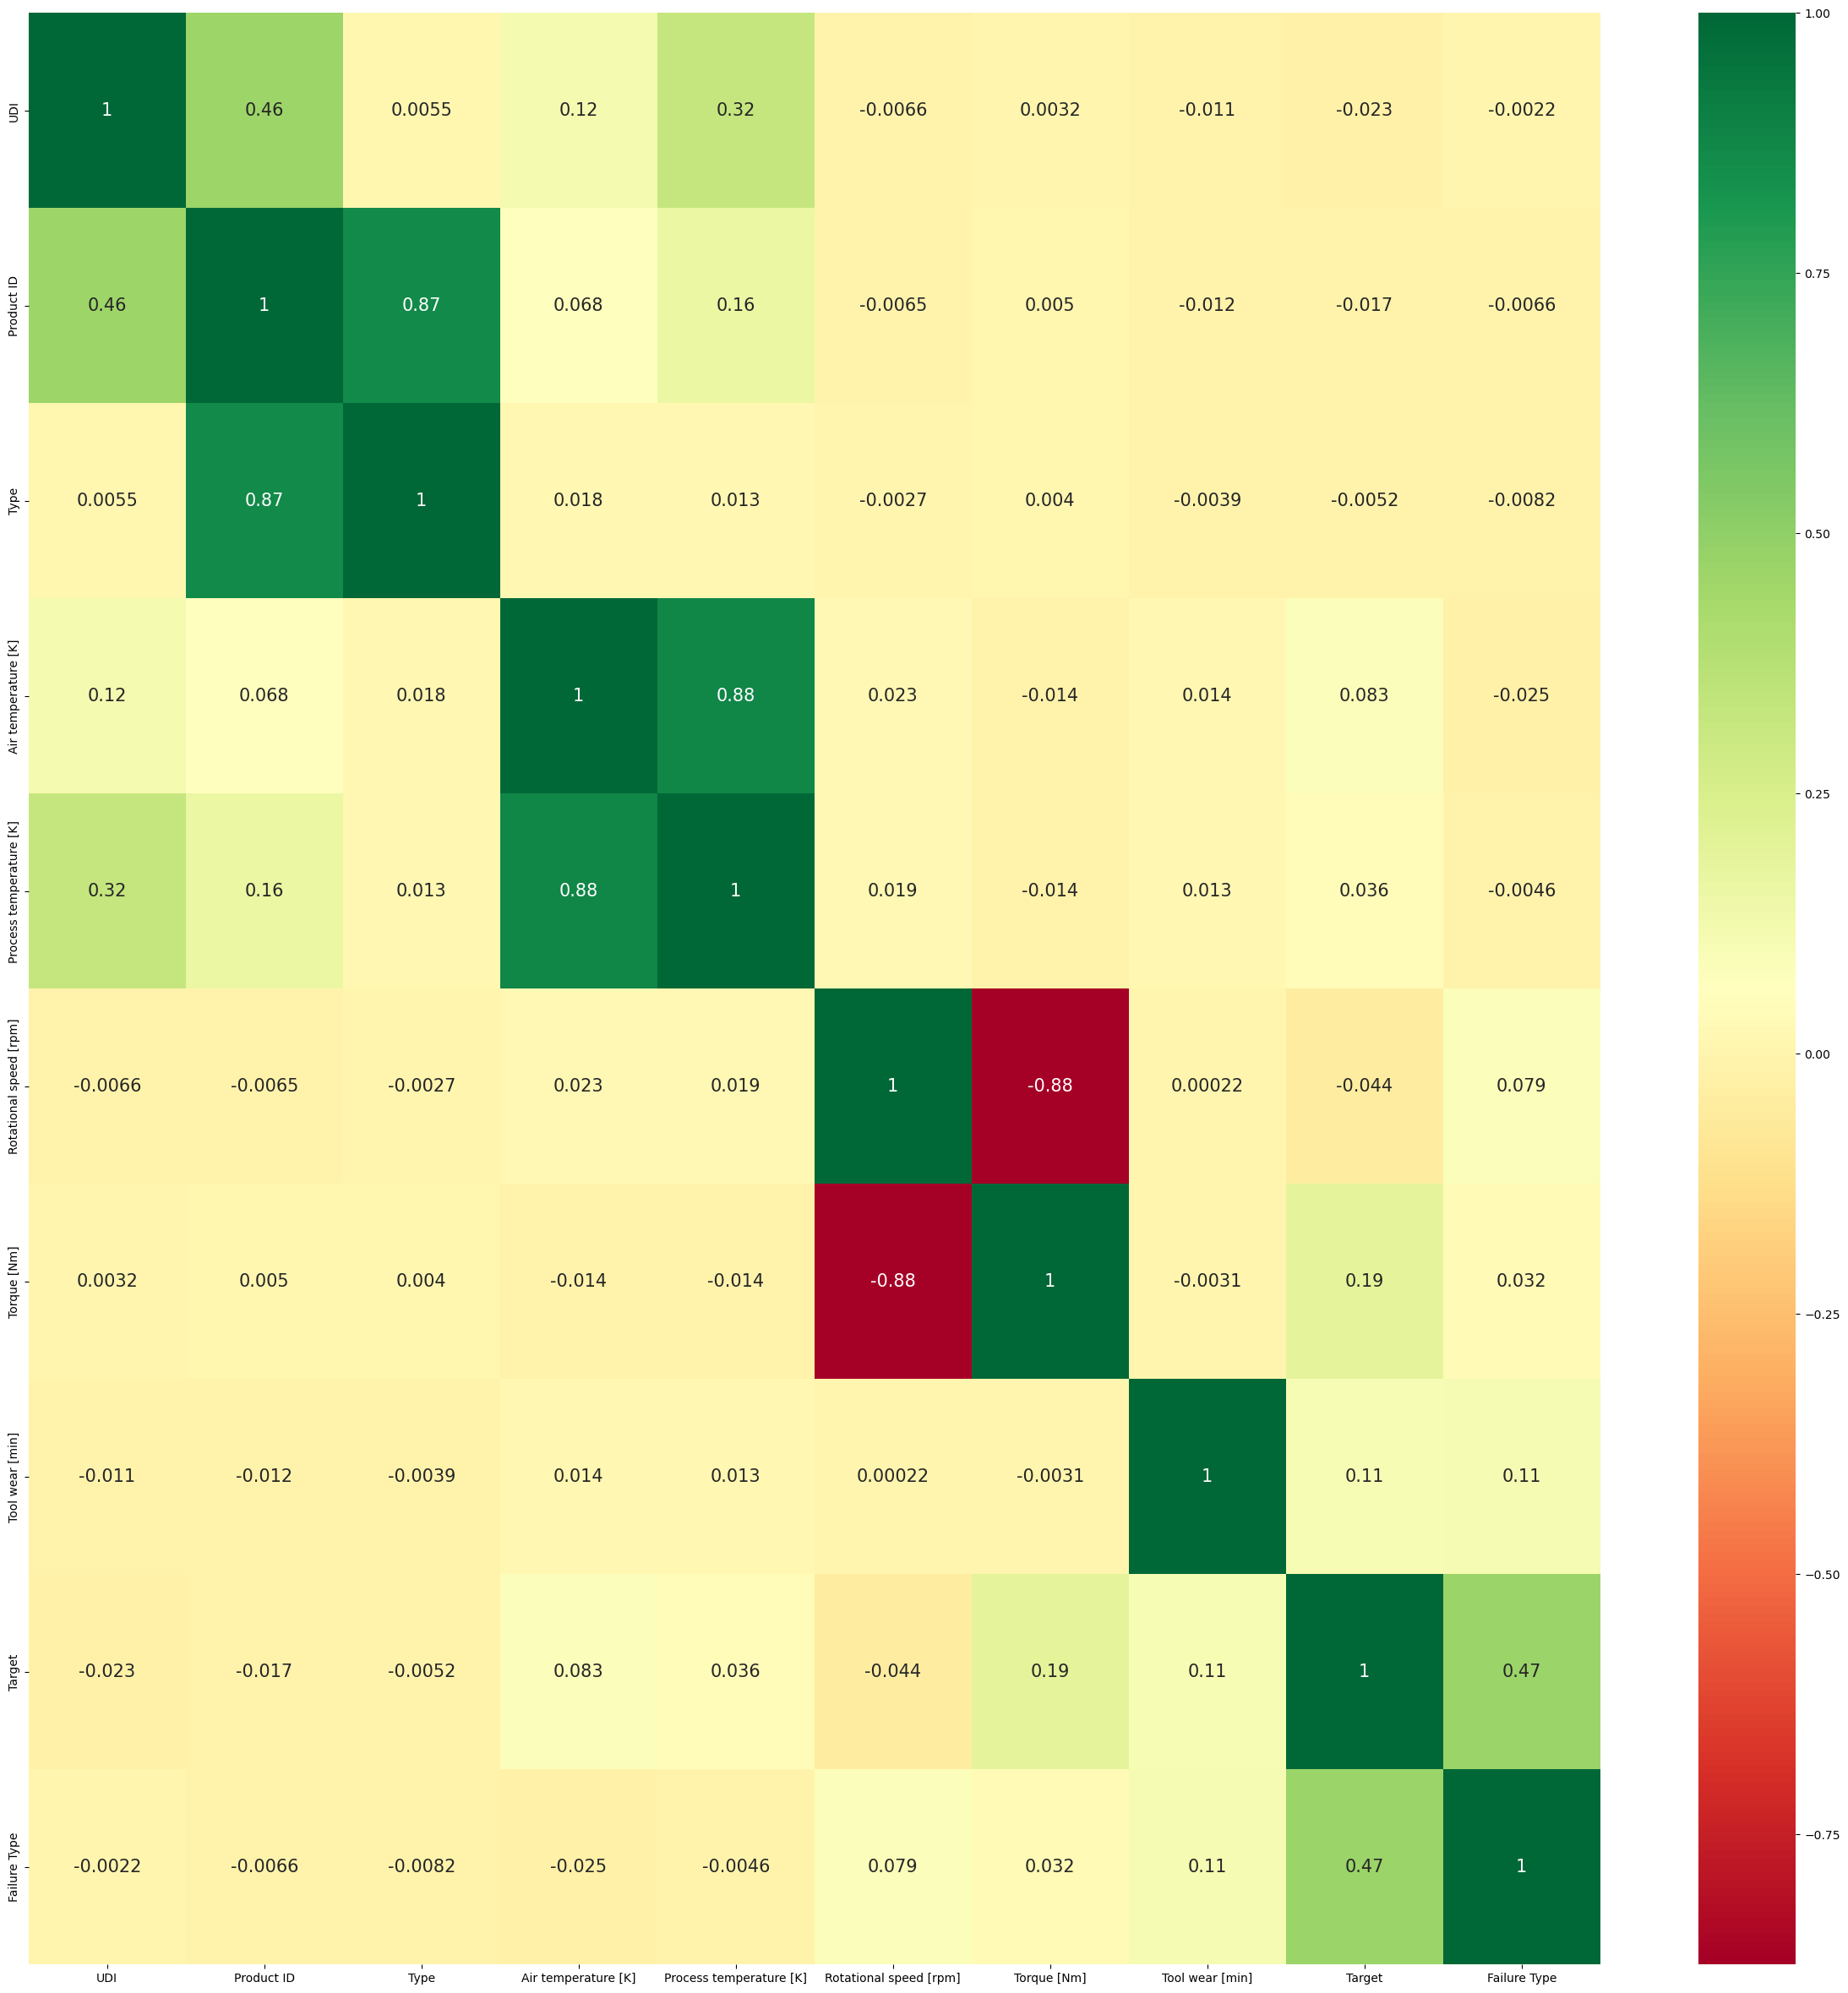

In [18]:
#checking correlations
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [19]:
#creation of model
X=df.drop(['Target'],axis=1)
y=df['Target']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [21]:
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
lg=LogisticRegression()
lg.fit(X_train,y_train)#fiting the model

LogisticRegression()

In [22]:
#predictions on testing data
y_pred=lg.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy for the model is:",accuracy_score(y_pred,y_test))
report=classification_report(y_pred,y_test)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy for the model is: 0.9816666666666667
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2945
           1       0.50      0.93      0.65        55

    accuracy                           0.98      3000
   macro avg       0.75      0.95      0.82      3000
weighted avg       0.99      0.98      0.98      3000

[[2894    4]
 [  51   51]]


In [24]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength with the 'alpha' parameter
ridge_model.fit(X_train, y_train)

# Create and train a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength with the 'alpha' parameter
lasso_model.fit(X_train, y_train)

Lasso()

In [25]:
#checking model score by using ridge and lasso
ridge_score = ridge_model.score(X_test, y_test)
print("Ridge Model Score:", ridge_score)

# Check the model score for Lasso
lasso_score = lasso_model.score(X_test, y_test)
print("Lasso Model Score:", lasso_score)

Ridge Model Score: 0.31231935536553745
Lasso Model Score: 0.0055536289941965356


In [26]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate R2 score
ridge_r2 = r2_score(y_test, ridge_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
# Calculate mean squared error (MSE)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

In [27]:
# Print the scores
print("Ridge R2 Score:", ridge_r2)
print("Lasso R2 Score:", lasso_r2)
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

Ridge R2 Score: 0.31231935536553745
Lasso R2 Score: 0.0055536289941965356
Ridge MSE: 0.022586183092374288
Lasso MSE: 0.032661596609314614


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
#testing data
y_pred_dt=dt.predict(X_test)

In [30]:
print("Accuracy with Decision tree model is:",accuracy_score(y_pred_dt,y_test))

Accuracy with Decision tree model is: 0.9966666666666667


In [31]:
#calculate the probability fuction for testing data
proba_dt = dt.predict_proba(X_test)
print(proba_dt)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [32]:
#now we will see the perfomance of decision tree model by giving some input sample values
sample=[[78,12,1,2,3,6,9,6,0.3]]
predictions=dt.predict(sample)
predictions
#The Model predicting the input samples for failure of machine which associated with value 1.

array([1])

[Text(0.6333333333333333, 0.9375, 'x[8] <= 1.5\ngini = 0.065\nsamples = 7000\nvalue = [6763, 237]'),
 Text(0.4666666666666667, 0.8125, 'x[8] <= 0.5\ngini = 0.025\nsamples = 6836\nvalue = [6750, 86]'),
 Text(0.4, 0.6875, 'gini = 0.0\nsamples = 83\nvalue = [0, 83]'),
 Text(0.5333333333333333, 0.6875, 'x[7] <= 209.5\ngini = 0.001\nsamples = 6753\nvalue = [6750, 3]'),
 Text(0.4, 0.5625, 'x[6] <= 29.15\ngini = 0.001\nsamples = 6525\nvalue = [6523, 2]'),
 Text(0.3333333333333333, 0.4375, 'x[6] <= 29.05\ngini = 0.004\nsamples = 897\nvalue = [895, 2]'),
 Text(0.13333333333333333, 0.3125, 'x[0] <= 8494.5\ngini = 0.002\nsamples = 880\nvalue = [879, 1]'),
 Text(0.06666666666666667, 0.1875, 'gini = 0.0\nsamples = 745\nvalue = [745, 0]'),
 Text(0.2, 0.1875, 'x[0] <= 8508.5\ngini = 0.015\nsamples = 135\nvalue = [134, 1]'),
 Text(0.13333333333333333, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.0625, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]'),
 Text(0.533333333

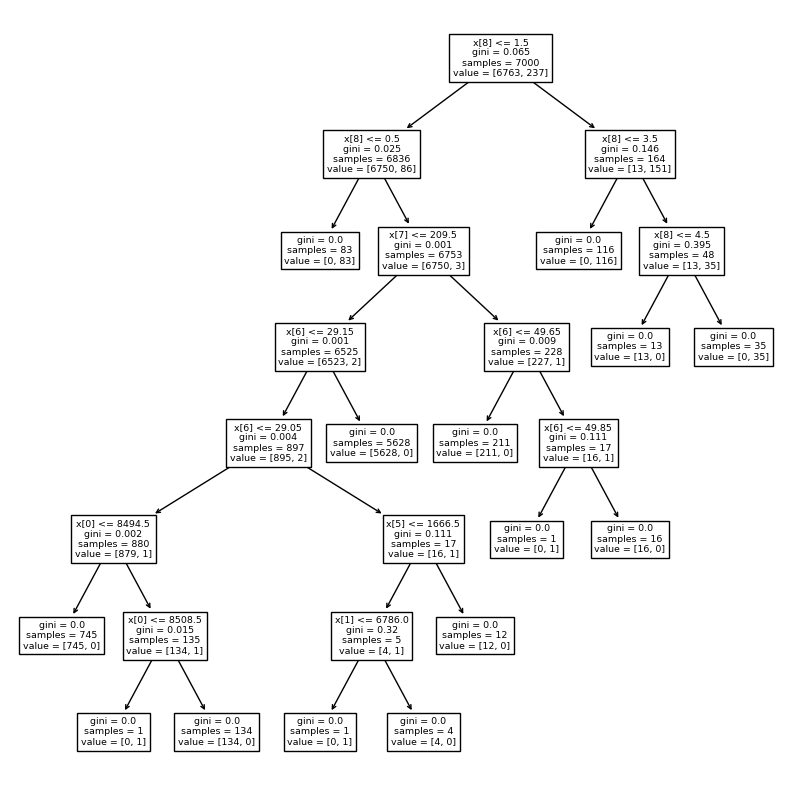

In [33]:
# Plot the decision tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt)

In [34]:
from sklearn.svm import SVC
svc_model=SVC(gamma=100)
#training model with support vector classifier
svc_model.fit(X_train,y_train)

SVC(gamma=100)

In [35]:
#making preditions on testin data
y_pred_svc=svc_model.predict(X_test)

In [36]:
print("Accuracy of SVC model:",accuracy_score(y_test,y_pred_svc)*100)
print("classification report for svc model",classification_report(y_test,y_pred_svc))

Accuracy of SVC model: 96.6
classification report for svc model               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2898
           1       0.00      0.00      0.00       102

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.97      0.95      3000



In [37]:
#test the predictions on input samples for svc model
sample=[[1,0.2,3.6,.2,4,5,6,88,5]]
predictions=svc_model.predict(sample)
predictions
#The model predicts for input samples is machine will not be fail.so it showing us 0.

array([0])

We have created the Logistic Regression model and also done the regularization with lasso and ridge. Then we creadted the Decision tree model for data and then we create the Support vector Classifier model and also evaluate the performance of data.